In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('raw_images.csv', header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 50177 entries, 0 to 50176
dtypes: int64(50177)
memory usage: 574.2 MB


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,50167,50168,50169,50170,50171,50172,50173,50174,50175,50176
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,187,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,255,255,201,44,25,111,108,147,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df.iloc[:, 0].values

print("Shape of target vector : ",y.shape)

Shape of target vector :  (1500,)


In [6]:
column_numbers = [x for x in range(df.shape[1])]  # list of columns' integer indices

column_numbers.remove(0) #removing column integer index 0
Features= df.iloc[:, column_numbers] #return all columns except the 0th column

In [7]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 50176 entries, 1 to 50176
dtypes: int64(50176)
memory usage: 574.2 MB


In [8]:
X=Features.values

In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [10]:
# Train a Random Forest to determine feature importance
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X, y)

RandomForestClassifier(random_state=42)

In [11]:
# Get feature importances and select top 5000 features
feature_importances = random_forest.feature_importances_
top_5000_indices = np.argsort(feature_importances)[-5000:]  # Indices of top 5000 features
X_reduced = X[:, top_5000_indices]

In [12]:
feature_importances[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
top_5000_indices[:100]

array([15132, 15133, 15134, 15135, 15136, 15137, 15138, 15117, 15140,
       15116, 15114, 15093, 15094, 15095, 15096, 15097, 15098, 15099,
       15100, 15101, 15102, 15103, 15104, 15105, 15106, 15107, 15108,
       15109, 15110, 15111, 15112, 15113, 15115, 15635, 14056, 14054,
       12999, 13000, 13001, 13002, 13003, 13004, 13005, 13006, 13007,
       12998, 13008, 13010, 13011, 13012, 13013, 13014, 13015, 13016,
       13017, 13018, 13009, 12997, 12996, 12995, 12974, 12975, 12976,
       12977, 12978, 12979, 12980, 12981, 12982, 12983, 12984, 12985,
       12986, 12987, 12988, 12989, 12990, 12991, 12992, 12993, 12994,
       13019, 12973, 13020, 13022, 13048, 13049, 13050, 13051, 13052,
       13053, 13054, 13055, 13056, 13047, 13057, 13059, 13060, 13061,
       13062], dtype=int64)

In [14]:
# Save the reduced dataset to a new CSV file
reduced_df = pd.DataFrame(X_reduced)
reduced_df.insert(0, 'Target', y)  # Add the target column back
reduced_df.to_csv('reduced_dataset.csv', index=False, header=False)

In [15]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 5001 entries, Target to 4999
dtypes: int64(5001)
memory usage: 57.2 MB


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X (features) and y (target) are already defined
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, stratify=y, random_state=42
)

# Display the number of samples and targets in each set
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


train_counts = dict(zip(*np.unique(y_train, return_counts=True)))
test_counts = dict(zip(*np.unique(y_test, return_counts=True)))


print(f"Training target distribution:\n{train_counts}")
print(f"Testing target distribution:\n{test_counts}")

Training samples: 1200, Testing samples: 300
Training target distribution:
{0: 600, 1: 600}
Testing target distribution:
{0: 150, 1: 150}


In [17]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report with 4 digits of precision
class_report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[150   0]
 [  0 150]]

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       150
           1     1.0000    1.0000    1.0000       150

    accuracy                         1.0000       300
   macro avg     1.0000    1.0000    1.0000       300
weighted avg     1.0000    1.0000    1.0000       300



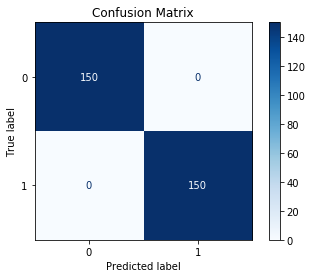

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

# Use ConfusionMatrixDisplay for a visual representation
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' ensures integer formatting
plt.title("Confusion Matrix")
plt.show()